In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the function and its gradient and Hessian
def f(x):
    return (2-2*x[0]-3*x[1])**2 + x[0]**2 +(x[1]-1)**2


def gradient_f(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 12 * x[0] + 20 * x[1] - 14])


def hessian_f():
    return np.array([[10, 12], [12, 20]])

## **Gradient Descent**

In [ ]:
# Set initial guess

x0 = np.array([1.5, 1.5])
tolerance = 10e-5
max_iter = 100
evolution_x_1 = []
evolution_x_2 = []
evolution_i = []
evolution_F = []
alpha = 10

In [ ]:
# Run Gradient Descent
x = x0
for i in range(max_iter):
    # Compute the Newton step
    f_x = f(x)
    evolution_F.append(f_x)
    evolution_x_1.append(x[0])
    evolution_x_2.append(x[1])
    evolution_i.append(i+1)
    grad = gradient_f(x)
    hess = hessian_f()

    # Calculate stepsize for Exact Line search
    gtg = np.dot(np.transpose(grad), grad)
    gtH = np.dot(np.transpose(grad), hess)
    gtHg = np.dot(gtH, grad)
    alpha_cauchy = gtg/gtHg
    #Check stopping criterion
    if np.linalg.norm(grad) < tolerance:
        break

    # Update x
    del_x = x - alpha_cauchy*grad
    g_x = f(del_x)
    x = del_x

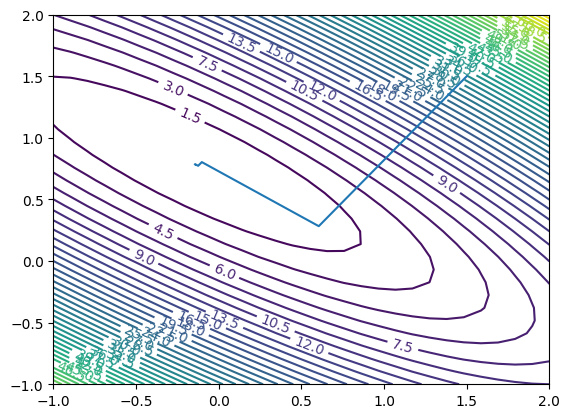

In [ ]:
#Plots

x1 = np.linspace(-1, 2, 30)
x2 = np.linspace(-1, 2, 30)
X1, X2 = np.meshgrid(x1, x2)
X = np.array([X1, X2])
Z = f(X)
contours = plt.contour(X1, X2, Z, 50)
plt.clabel(contours, inline=True, fontsize=10)
plt.plot(evolution_x_1, evolution_x_2)
plt.show()

In [ ]:
# Valules of x1, x2 and x3 for the given initial values
print(f'Initial values for x2 = {x0[0]}, and x3 = {x0[1]}')
print(f'Corresponding solution = {f_x}')
print(f'x1 = {1 - 2*x[0] - 3*x[1]}')
print(f'x2 = {x[0]}')
print(f'x3 = {x[1]}')

Initial values for x2 = 1.5, and x3 = 1.5
Corresponding solution = 0.07142857162031672
x1 = -1.0714284072080016
x2 = -0.14284564741725153
x3 = 0.7857065673475015


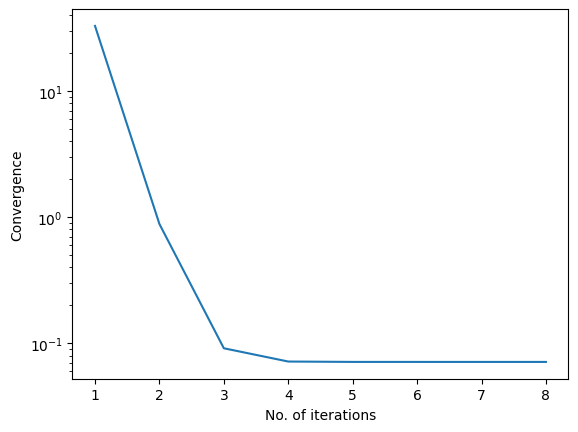

In [ ]:
# Log Linear convergance plot

plt.yscale("log")
plt.plot(evolution_i, evolution_F)
plt.ylabel("Convergence")
plt.xlabel("No. of iterations")
plt.show()

## **Newton's Method**

In [ ]:
# Set initial guess

x0 = np.array([1, 1])
tol = 10e-5
max_iter = 100
evolution_x_1 = []
evolution_x_2 = []
evolution_i = []
evolution_F = []
alpha = 10

In [ ]:
# Run Newton's Algorithm
x = x0
for i in range(max_iter):
    # Compute the Newton step
    f_x = f(x)
    evolution_F.append(f_x)
    evolution_x_1.append(x[0])
    evolution_x_2.append(x[1])
    evolution_i.append(i+1)
    grad = gradient_f(x)
    hess = hessian_f()
    step = np.linalg.solve(hess, grad)

    # Check stopping criterion
    if np.linalg.norm(grad) < tol:
        break

    # Perform backtracking line search to choose step size
    t = 1
    while f(x - t * step) > f(x) - 0.5 * t * grad.dot(step):
        t *= 0.5

    # Update x
    x = x - t * step

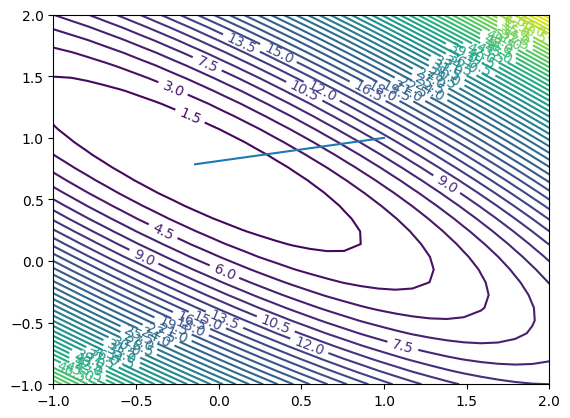

In [ ]:
#Plots

x1 = np.linspace(-1, 2, 30)
x2 = np.linspace(-1, 2, 30)
X1, X2 = np.meshgrid(x1, x2)
X = np.array([X1, X2])
Z = f(X)
contours = plt.contour(X1, X2, Z, 50)
plt.clabel(contours, inline=True, fontsize=10)
plt.plot(evolution_x_1, evolution_x_2)
plt.show()

In [ ]:
# Valules of x1, x2 and x3 for the given initial values

print(f'Initial values for x2 = {x0[0]}, and x3 = {x0[1]}')
print(f'Corresponding solution = {f_x}')
print(f'x1 = {1 - 2*x[0] - 3*x[1]}')
print(f'x2 = {x[0]}')
print(f'x3 = {x[1]}')

Initial values for x2 = 1, and x3 = 1
Corresponding solution = 0.07142857142857141
x1 = -1.0714285714285712
x2 = -0.1428571428571424
x3 = 0.7857142857142854


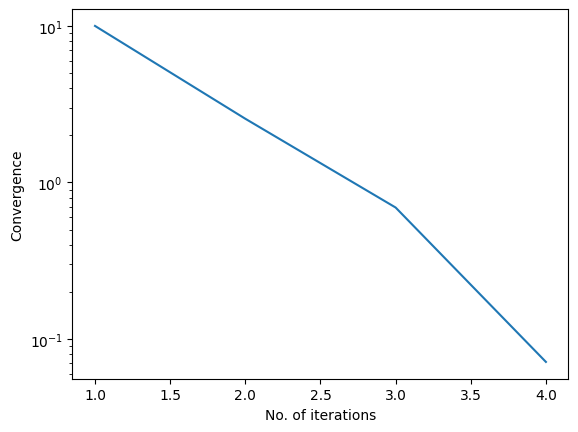

In [ ]:
# Log Linear convergance plot

plt.yscale("log")
plt.plot(evolution_i, evolution_F)
plt.ylabel("Convergence")
plt.xlabel("No. of iterations")
plt.show()